In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('birds.csv')
df.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                443 non-null    object 
 1   ScientificName      443 non-null    object 
 2   Category            443 non-null    object 
 3   Order               443 non-null    object 
 4   Family              443 non-null    object 
 5   Genus               443 non-null    object 
 6   ConservationStatus  443 non-null    object 
 7   MinLength           443 non-null    float64
 8   MaxLength           443 non-null    float64
 9   MinBodyMass         443 non-null    float64
 10  MaxBodyMass         443 non-null    float64
 11  MinWingspan         443 non-null    float64
 12  MaxWingspan         443 non-null    float64
dtypes: float64(6), object(7)
memory usage: 45.1+ KB


In [71]:
df.describe()

,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
count,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000
mean,28.536682,35.441986,327.938262,667.009752,58.557901,67.524492
std,20.319887,27.539772,779.680106,1655.682564,104.602369,126.673177
min,7.000000,8.900000,2.000000,3.000000,8.000000,10.600000
25%,13.750000,16.000000,18.000000,28.000000,23.000000,25.000000
50%,20.500000,25.000000,55.000000,89.000000,38.000000,42.000000
75%,39.000000,46.000000,332.000000,593.000000,72.750000,83.000000
max,138.000000,180.000000,9200.000000,14300.000000,1800.000000,2300.000000


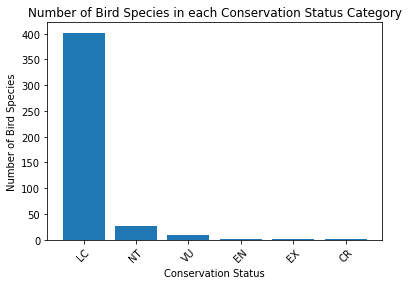

In [72]:
status_counts = df['ConservationStatus'].value_counts()
plt.bar(status_counts.index, status_counts.values)
plt.xlabel('Conservation Status')
plt.ylabel('Number of Bird Species')
plt.title('Number of Bird Species in each Conservation Status Category')
plt.xticks(rotation=45)
plt.show()


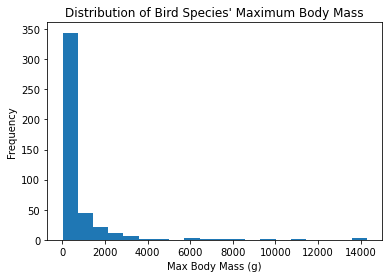

In [73]:
plt.hist(birds['MaxBodyMass'], bins=20)
plt.xlabel('Max Body Mass (g)')
plt.ylabel('Frequency')
plt.title('Distribution of Bird Species\' Maximum Body Mass')
plt.show()


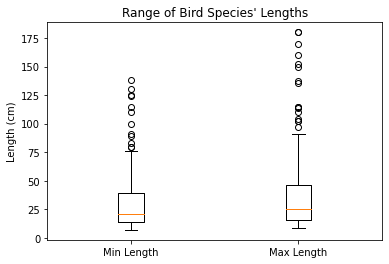

In [74]:
plt.boxplot([df['MinLength'], df['MaxLength']])
plt.xticks([1, 2], ['Min Length', 'Max Length'])
plt.ylabel('Length (cm)')
plt.title('Range of Bird Species\' Lengths')
plt.show()


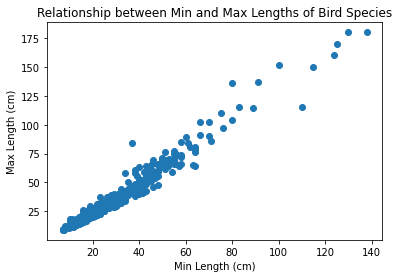

In [75]:
plt.scatter(df['MinLength'], df['MaxLength'])
plt.xlabel('Min Length (cm)')
plt.ylabel('Max Length (cm)')
plt.title('Relationship between Min and Max Lengths of Bird Species')
plt.show()


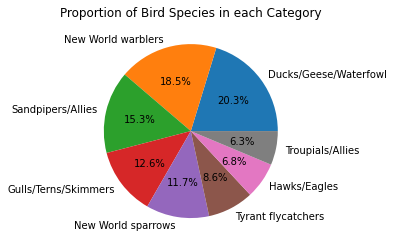

In [76]:
category_counts = df['Category'].value_counts()
category_percentages = category_counts / category_counts.sum() * 100

# Identify categories with less than 3% value
small_categories = category_percentages[category_percentages < 3].index

# Replace small categories with "Others"
category_counts.loc[small_categories] = category_counts[small_categories].sum()
category_counts = category_counts.drop(small_categories)

# Plot the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Bird Species in each Category')
plt.show()


<Figure size 1296x1080 with 0 Axes>

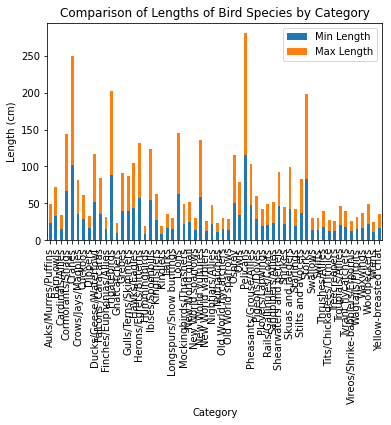

In [79]:

category_lengths = df.groupby('Category')[['MinLength', 'MaxLength']].mean()
category_lengths.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Length (cm)')
plt.title('Comparison of Lengths of Bird Species by Category')
plt.legend(['Min Length', 'Max Length'])
plt.show()


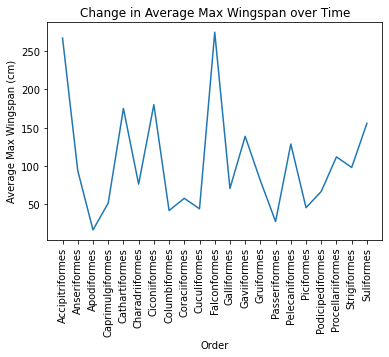

In [85]:
avg_wingspan = df.groupby('Order')['MaxWingspan'].mean()
plt.plot(avg_wingspan.index, avg_wingspan.values)
plt.xlabel('Order')
plt.ylabel('Average Max Wingspan (cm)')
plt.title('Change in Average Max Wingspan over Time')
plt.xticks(rotation=90)
plt.show()


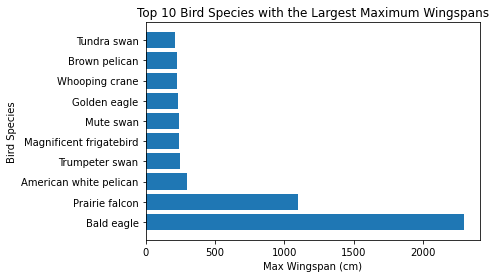

In [88]:
top_10_wingspan = df.nlargest(10, 'MaxWingspan')
plt.barh(top_10_wingspan['Name'], top_10_wingspan['MaxWingspan'])
plt.xlabel('Max Wingspan (cm)')
plt.ylabel('Bird Species')
plt.title('Top 10 Bird Species with the Largest Maximum Wingspans')
plt.show()


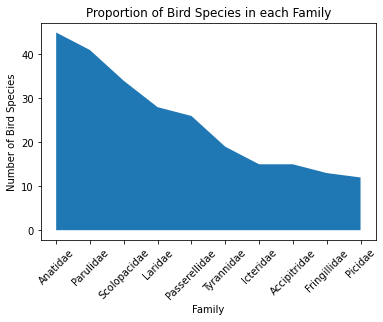

In [87]:
family_counts = df['Family'].value_counts().nlargest(10)
plt.fill_between(family_counts.index, family_counts.values)
plt.xlabel('Family')
plt.ylabel('Number of Bird Species')
plt.title('Proportion of Bird Species in each Family')
plt.xticks(rotation=45)
plt.show()


In [ ]:
data = pd.read_csv('snow-geese-migration.csv')

# Create a scatter plot using seaborn's scatterplot function
sns.scatterplot(data=data, x='Temperature', y='Migration Date')

plt.xlabel('Temperature')

plt.ylabel('Migration Date')


plt.title('Snow Goose Migration and Temperature')


sns.lineplot(data=data, x='Temperature', y='Migration Date', sort=True, marker='o')

plt.show()
